In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df_standings = pd.read_csv('Standings.csv')
df_standings = df_standings.drop(['Unnamed: 0'], axis=1)
df_standings = df_standings[df_standings.Campaign < 2021]
df_standings

,Campaign,Teams,GP,W,D,L,F,A,GD,P
20,2004,JUV,38,26,8,4,67,27,40,86
21,2004,MIL,38,23,10,5,63,28,35,79
22,2004,INT,38,18,18,2,65,37,28,72
23,2004,UDN,38,17,11,10,56,40,16,62
24,2004,SAM,38,17,10,11,42,29,13,61
...,...,...,...,...,...,...,...,...,...,...
355,2020,CAG,38,9,10,19,43,59,-16,37
356,2020,TOR,38,7,16,15,50,69,-19,37
357,2020,BEN,38,7,12,19,40,75,-35,33
358,2020,CRO,38,6,5,27,45,92,-47,23


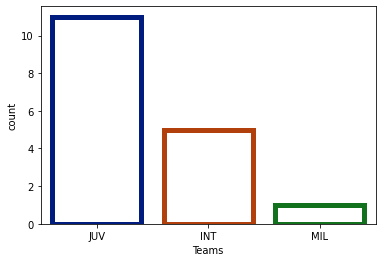

In [85]:
df_winners = df_standings.loc[df_standings.groupby('Campaign')['P'].idxmax()].set_index('Campaign')
sns.countplot(x='Teams', data=df_winners,
             facecolor=(0,0,0,0), linewidth=5,
             edgecolor=sns.color_palette("dark", 3));

In [90]:
pd.DataFrame(df_winners.Teams.value_counts())

,Teams
JUV,11
INT,5
MIL,1


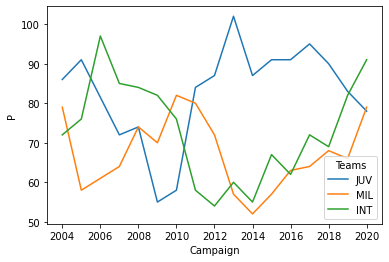

In [77]:
df_top3 = df_standings.loc[(df_standings.Teams == 'JUV') | (df_standings.Teams == 'INT') | (df_standings.Teams == 'MIL')]
sns.lineplot(data=df_top3, x='Campaign', y='P', hue='Teams');

In [94]:
round(df_top3.groupby('Teams').agg({'P':'mean'}),2)

,P
Teams,
INT,73.06
JUV,82.75
MIL,67.41


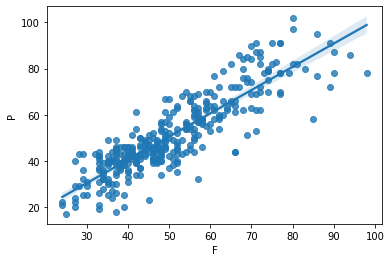

In [37]:
sns.regplot(x='F', y='P', data=df_standings);

In [55]:
round(np.corrcoef(df_standings.F, df_standings.P)[0][1]**2,2)

0.76

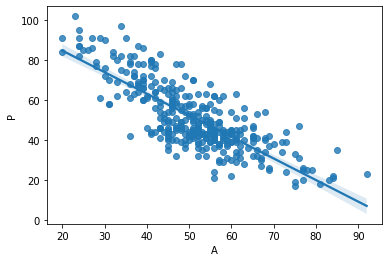

In [43]:
sns.regplot(x='A', y='P', data=df_standings);

In [56]:
round(np.corrcoef(df_standings.A, df_standings.P)[0][1]**2,2)

0.63

In [ ]:
#refs
"""
https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python

"""